In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import matplotlib.image as mpimg
from ipywidgets import widgets
import os

In [3]:
print(os.getcwd())

d:\TensorflowPractice\venv\T5


In [4]:
TRAIN_DIR = r"D:\TensorflowPractice\venv\Datasets\horse-or-human"
print(os.listdir(TRAIN_DIR))

['horses', 'humans']


In [5]:
train_horses_path = os.path.join(TRAIN_DIR,'horses')
train_human_path = os.path.join(TRAIN_DIR,'humans')

horses_images = os.listdir(train_horses_path)
print("five images of horses training dataset : ",horses_images[:5])
human_images = os.listdir(train_human_path)
print("five images of horses training dataset : ",human_images[:5])

five images of horses training dataset :  ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
five images of horses training dataset :  ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png']


In [6]:
print(f'total number of images of horse : {len(os.listdir(train_horses_path))}')
print(f'total number of images of human : {len(os.listdir(train_human_path))}')

total number of images of horse : 500
total number of images of human : 527


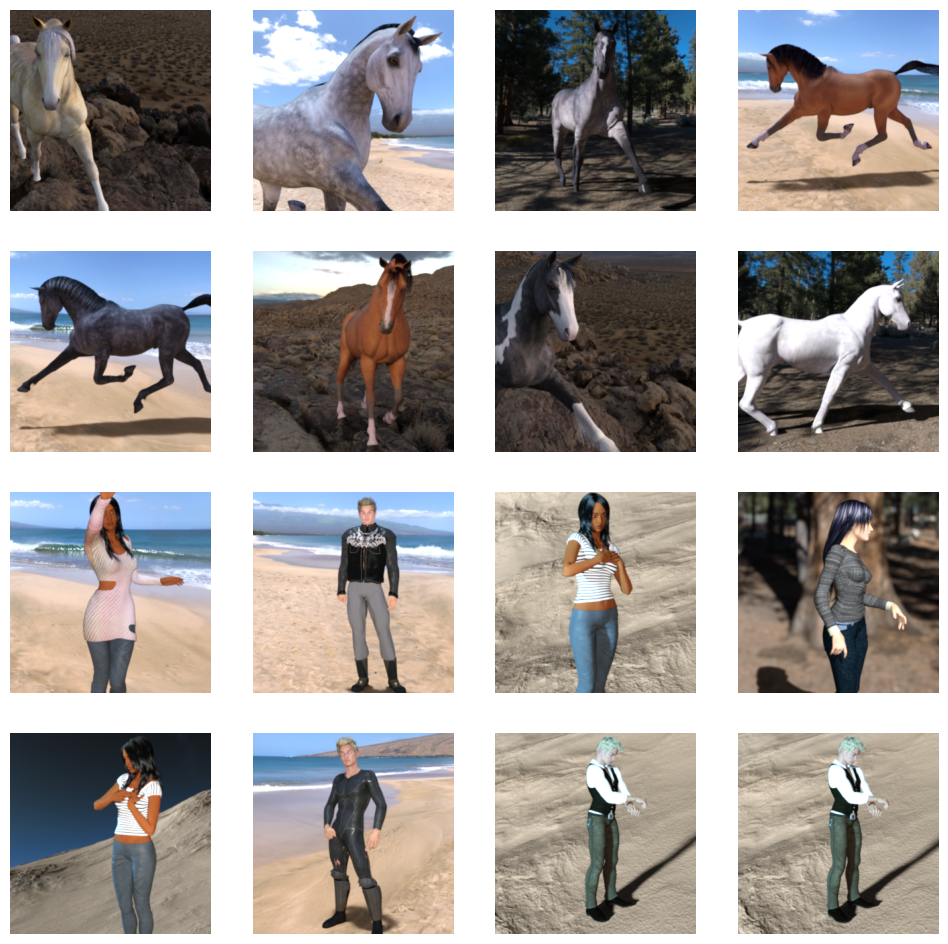

In [7]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horses_path, fname)
                for fname in random.sample(horses_images, k=8)]
next_human_pix = [os.path.join(train_human_path, fname)
                for fname in random.sample(human_images, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(300,300),
    batch_size=32,
    label_mode = 'binary'
)

print('type offf dataset is : ' , type(train_dataset))
print('length of train_dataset (i.e number of batches in train dataset) : ', len(train_dataset))

Found 1027 files belonging to 2 classes.
type offf dataset is :  <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
length of train_dataset (i.e number of batches in train dataset) :  33


In [9]:
# total_images = np.concat([images for images, labels in train_dataset],axis=0)
# print(f'total number of images : {total_images.shape[0]}')

In [10]:
sample_batch = list(train_dataset.take(1))[0]
print(f'sample batch data type: {type(sample_batch)}')
print(f'number of elements: {len(sample_batch)}')
image_batch = sample_batch[0]
label_batch = sample_batch[1]
# Check the shapes
print(f'image batch shape: {image_batch.shape}')
print(f'label batch shape: {label_batch.shape}')

sample batch data type: <class 'tuple'>
number of elements: 2
image batch shape: (32, 300, 300, 3)
label batch shape: (32, 1)


In [11]:
# Check the range of values
print(f'max value: {np.max(image_batch[0].numpy())}')
print(f'min value: {np.min(image_batch[0].numpy())}')

max value: 255.0
min value: 16.0


In [12]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [13]:
image_scaled_sample = rescale_layer(image_batch[3]).numpy()
print("sample of image scaled " , image_scaled_sample)

sample of image scaled  [[[1.         0.92549026 0.8588236 ]
  [1.         0.9215687  0.8588236 ]
  [1.         0.9215687  0.86274517]
  ...
  [1.         0.91372555 0.85098046]
  [1.         0.909804   0.83921576]
  [1.         0.9058824  0.83921576]]

 [[1.         0.94117653 0.8745099 ]
  [1.         0.94117653 0.87843144]
  [1.         0.9490197  0.89019614]
  ...
  [1.         0.92549026 0.8588236 ]
  [1.         0.91372555 0.8431373 ]
  [1.         0.8980393  0.8352942 ]]

 [[1.         0.9333334  0.86666673]
  [1.         0.9333334  0.86666673]
  [1.         0.93725497 0.8705883 ]
  ...
  [1.         0.8980393  0.8313726 ]
  [1.         0.89019614 0.8235295 ]
  [1.         0.90196085 0.83921576]]

 ...

 [[0.8313726  0.7019608  0.5803922 ]
  [0.8235295  0.69411767 0.5686275 ]
  [0.81568635 0.6862745  0.5647059 ]
  ...
  [0.8941177  0.76470596 0.6509804 ]
  [0.8941177  0.7607844  0.6392157 ]
  [0.95294124 0.8117648  0.6862745 ]]

 [[0.8313726  0.7019608  0.5803922 ]
  [0.8313726 

In [14]:
print(f'max value: {np.max(image_scaled_sample)}')
print(f'min value: {np.min(image_scaled_sample)}')

max value: 1.0
min value: 0.07058823853731155


In [15]:
train_dataset_scaled = train_dataset.map(lambda image,label: (rescale_layer(image),label))

In [16]:
sample_batch = list(train_dataset_scaled.take(2))[0]

image_scaled = sample_batch[0][1].numpy()

# Check the range of values for this image
print(f'max value: {np.max(image_scaled)}')
print(f'min value: {np.min(image_scaled)}')

max value: 1.0
min value: 0.03529411926865578


In [17]:
SHUFFLE_BUFFER_SIZE = 1000

trained_dataset_final = (
    train_dataset_scaled
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,450,145 (32.23 MB)

 Trainable params: 8,450,145 (32.23 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy' , 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
history = model.fit(trained_dataset_final,epochs=15,verbose=2)

Epoch 1/15
33/33 - 10s - 290ms/step - accuracy: 0.5501 - loss: 0.8782
Epoch 2/15
33/33 - 14s - 418ms/step - accuracy: 0.7955 - loss: 0.6869
Epoch 3/15
33/33 - 7s - 220ms/step - accuracy: 0.9250 - loss: 0.2038
Epoch 4/15
33/33 - 7s - 226ms/step - accuracy: 0.9542 - loss: 0.1142
Epoch 5/15
33/33 - 7s - 220ms/step - accuracy: 0.9464 - loss: 0.4154
Epoch 6/15
33/33 - 7s - 225ms/step - accuracy: 0.9834 - loss: 0.0429
Epoch 7/15
33/33 - 8s - 233ms/step - accuracy: 0.9640 - loss: 0.1932
Epoch 8/15
33/33 - 7s - 219ms/step - accuracy: 0.9942 - loss: 0.0159
Epoch 9/15
33/33 - 7s - 214ms/step - accuracy: 0.9796 - loss: 0.1098
Epoch 10/15
33/33 - 7s - 213ms/step - accuracy: 0.9961 - loss: 0.0153
Epoch 11/15
33/33 - 7s - 214ms/step - accuracy: 0.9659 - loss: 0.1749
Epoch 12/15
33/33 - 7s - 225ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 13/15
33/33 - 7s - 218ms/step - accuracy: 1.0000 - loss: 3.2503e-04
Epoch 14/15
33/33 - 7s - 212ms/step - accuracy: 1.0000 - loss: 9.0155e-05
Epoch 15/15
33/33 -

[]

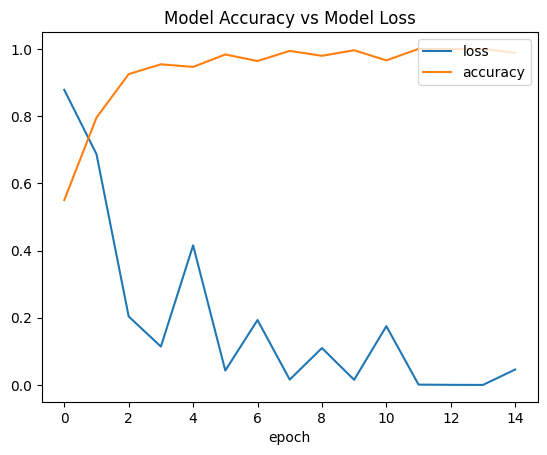

In [23]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('Model Accuracy vs Model Loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss','accuracy'],loc='upper right')
pyplot.plot()

In [25]:
from io import BytesIO

In [27]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

d:\TensorflowPractice\venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28704\3176135765.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28704\3176135765.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


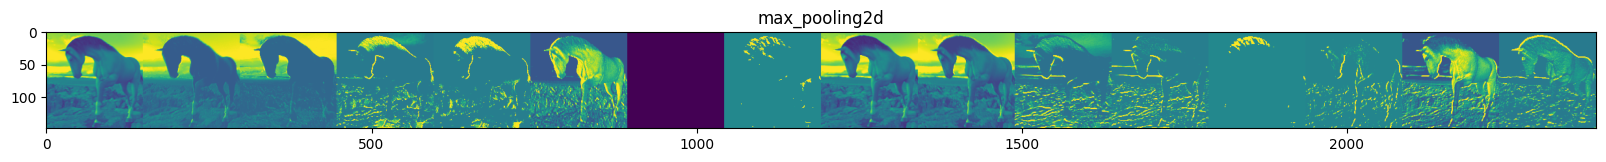

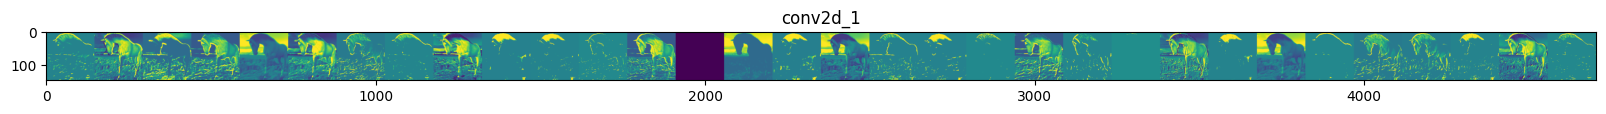

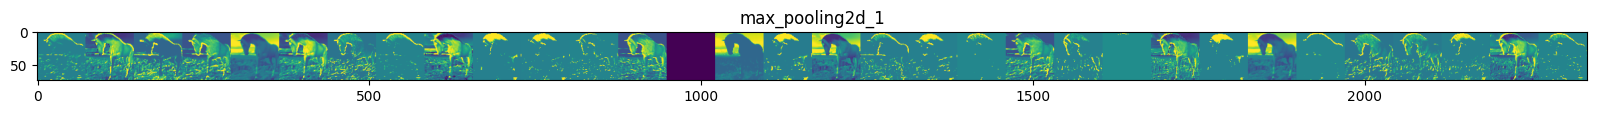

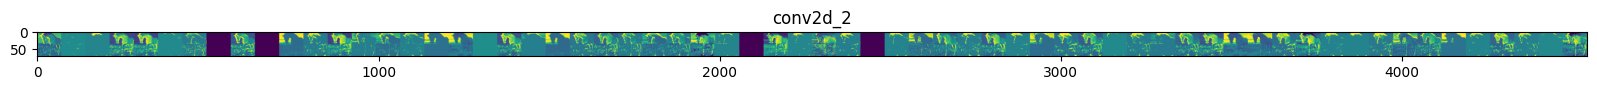

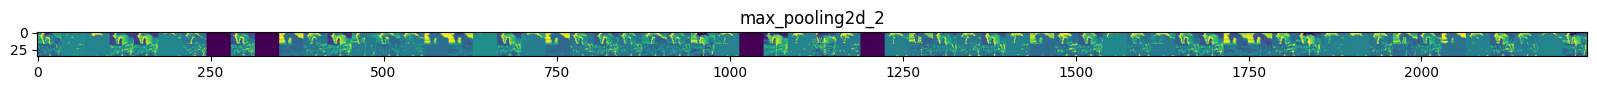

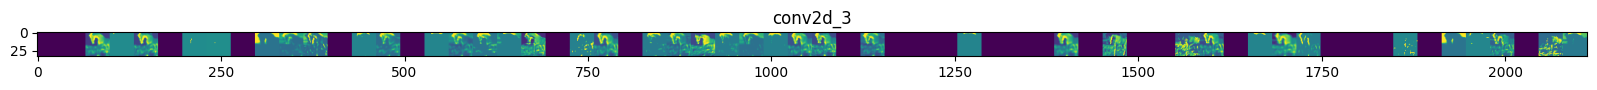

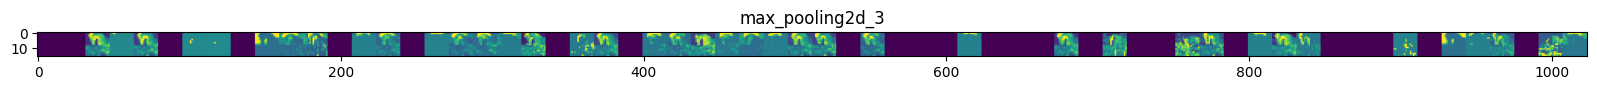

In [30]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horses_path, f) for f in os.listdir(train_horses_path)]
human_img_files = [os.path.join(train_human_path, f) for f in os.listdir(train_human_path)]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')